In [1]:
# Hw-4 - Group 41
# GRAPH SPECTRA
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy
import os

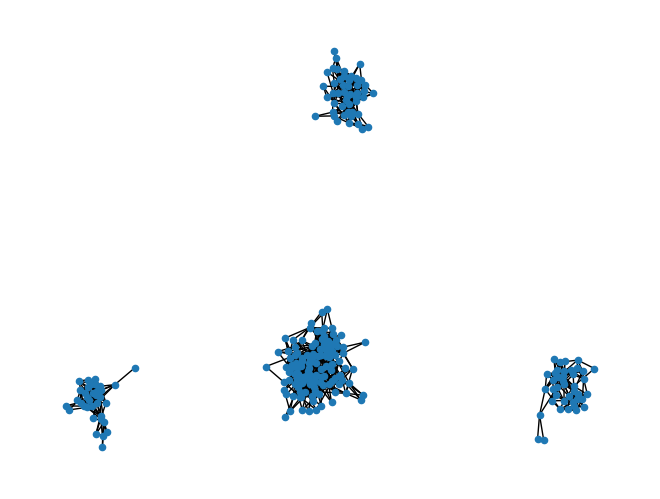

In [13]:
# Dataset 1
path = os.path.join('data', 'example1.dat')
with open(path) as f:
    edges = [tuple([int(x) for x in line.strip().split(',')]) for line in f]

# Extract nodes
nodes = np.unique(np.asarray(edges)) # 0 - 241
num_nodes = nodes.shape[0] # 241

# Visualize graph for finding the number of k 
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, node_size=20)
plt.show()


In [29]:
# On Spectral Clustering Algorithm
# Step 1 - Create Affinity Matrix
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    # print(tup[0], tup[1], tup[0]-1, tup[1]-1)
    A[tup[0]-1, tup[1]-1] = 1
    
print(A)
# A_new = np.zeros([num_nodes, num_nodes])
# for i in range(0, nodes.shape[0]):
#     S_i = nodes[i]
#     ro = 0.5
#     for j in range (0, nodes.shape[0]):
#         S_j = nodes[j]
#         A_new[i][j] = np.exp((-0.5)*(np.sum(np.square((S_i-S_j)))/(ro**2)))
        
# for i in range(0,A_new.shape[0]):
#     A_new[i][i] = 0
        
# print((A == A_new).all())


[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
# Step 2.1 - Diagnoal Matrix D
D = np.diag(np.sum(A, axis=1))
print(D)

[[7. 0. 0. ... 0. 0. 0.]
 [0. 8. 0. ... 0. 0. 0.]
 [0. 0. 9. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 5. 0.]
 [0. 0. 0. ... 0. 0. 2.]]


In [33]:
# Step 2.2 - Matrix L (normalized laplacian) = D^-1/2 * A * D^-1/2
D_Inverse = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_Inverse, A), D_Inverse)

print(L)

[[0.         0.13363062 0.12598816 ... 0.         0.         0.        ]
 [0.13363062 0.         0.         ... 0.         0.         0.        ]
 [0.12598816 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


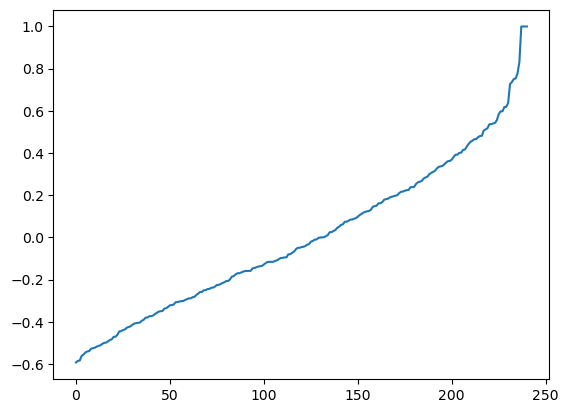

k = 4.


In [39]:
# Step 3.1 - Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
w, v = scipy.linalg.eigh(L)
plt.plot(w)
plt.show()

# Step 3.2 - Find optimal k (where the eigenvalues start dropping)
# ediff1d = the differences between consecutive elements of an array
# flipud = reverse the order of elements along axis 0 (up/down)
k = np.argmin(np.ediff1d(np.flipud(w))) + 1
print('k = %d.' % k)

# Step 3.3 Extract k largest eigenvectors
X = v[:, num_nodes - k:]
# print(X)

In [41]:
# Step 4 - Construct matrix Y by renormalizing X
Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))
# print(Y)

In [43]:
# Step 5 - KMeans Cluster - Treating each row of Y as a point in R^k cluster them into k clusters
# Cluster rows of Y into k clusters using K-means 
kmeans = KMeans(n_clusters=k, random_state=1234).fit(Y)

KMeans(n_clusters=4, random_state=1234)


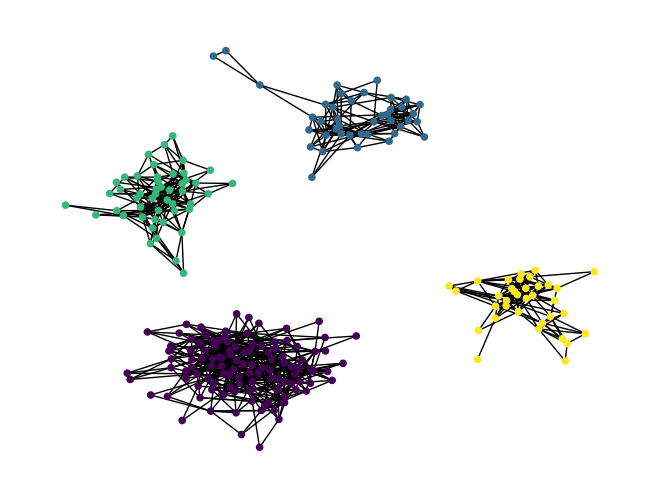

In [48]:
# Step 6 - Assign original point i to the cluster of the row i of matrix Y
cluster_labels = kmeans.labels_
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=cluster_labels)

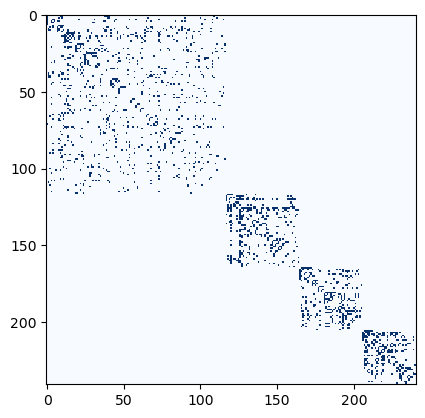

In [49]:
# Sparsity Pattern validating our results
plt.imshow(A, cmap='Blues', interpolation='nearest')
plt.show()

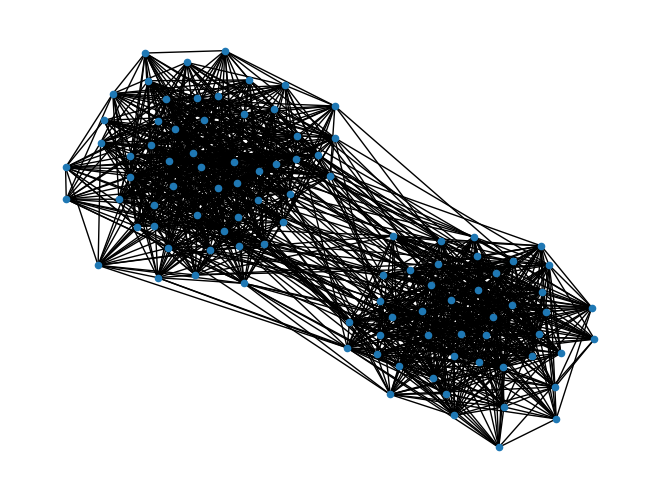

In [52]:
# Dataset 2
path_2 = os.path.join('data', 'example2.dat')
with open(path_2) as f:
    edges_2 = [tuple([int(x) for x in line.strip().split(',')]) for line in f]
edges_2 = [tuple([edge[0], edge[1]]) for edge in edges_2]
# Extract nodes
nodes_2 = np.unique(np.asarray(edges_2)) # 0 - 241
num_nodes_2 = nodes_2.shape[0] # 241

# Visualize graph for finding the number of k 
G_2 = nx.Graph()
G_2.add_nodes_from(nodes_2)
G_2.add_edges_from(edges_2)
nx.draw(G_2, node_size=20)
plt.show()


In [53]:
# On Spectral Clustering Algorithm
# Step 1 - Create Affinity Matrix
A_2 = np.zeros([num_nodes_2, num_nodes_2])
for tup in edges_2:
    # print(tup[0], tup[1], tup[0]-1, tup[1]-1)
    A_2[tup[0]-1, tup[1]-1] = 1
    
print(A_2, A_2.shape)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]] (100, 100)


In [54]:
# Step 2.1 - Diagnoal Matrix D
D_2 = np.diag(np.sum(A_2, axis=1))
print(D_2)

[[23.  0.  0. ...  0.  0.  0.]
 [ 0. 17.  0. ...  0.  0.  0.]
 [ 0.  0. 26. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 17.  0.  0.]
 [ 0.  0.  0. ...  0. 23.  0.]
 [ 0.  0.  0. ...  0.  0. 33.]]


In [55]:
# Step 2.2 - Matrix L (normalized laplacian) = D^-1/2 * A * D^-1/2
D_Inverse_2 = np.linalg.inv(np.sqrt(D_2))
L_2 = np.dot(np.dot(D_Inverse_2, A_2), D_Inverse_2)

print(L_2)

[[0.         0.05057217 0.         ... 0.         0.         0.        ]
 [0.05057217 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04756515 0.04089304 0.03413944]
 ...
 [0.         0.         0.04756515 ... 0.         0.         0.        ]
 [0.         0.         0.04089304 ... 0.         0.         0.0362977 ]
 [0.         0.         0.03413944 ... 0.         0.0362977  0.        ]]


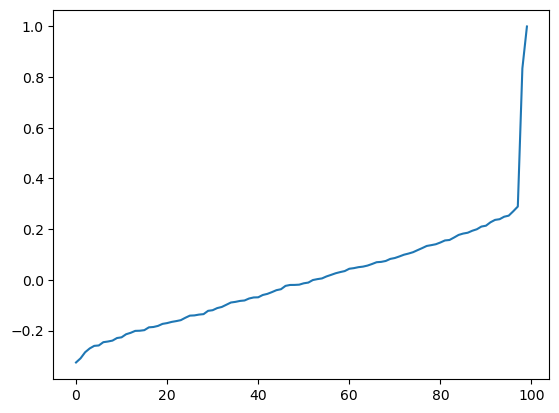

k = 2.


In [56]:
# Step 3.1 - Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
w_2, v_2 = scipy.linalg.eigh(L_2)
plt.plot(w_2)
plt.show()

# Step 3.2 - Find optimal k (where the eigenvalues start dropping)
# ediff1d = the differences between consecutive elements of an array
# flipud = reverse the order of elements along axis 0 (up/down)
k_2 = np.argmin(np.ediff1d(np.flipud(w_2))) + 1
print('k = %d.' % k_2)

# Step 3.3 Extract k largest eigenvectors
X_2 = v_2[:, num_nodes_2 - k_2:]
# print(X)

In [59]:
# Step 4 - Construct matrix Y by renormalizing X
Y_2 = np.divide(X_2, np.reshape(np.linalg.norm(X_2, axis=1), (X_2.shape[0], 1)))
print(Y_2)

[[-0.73944909 -0.67321248]
 [-0.74722164 -0.66457492]
 [ 0.68664762 -0.72699041]
 [-0.6967126  -0.71735037]
 [-0.73050708 -0.68290512]
 [ 0.6456588  -0.76362603]
 [ 0.56201719 -0.82712555]
 [-0.75048282 -0.66088996]
 [-0.74411995 -0.66804603]
 [-0.74304756 -0.66923862]
 [ 0.7130389  -0.70112448]
 [-0.72795381 -0.68562618]
 [-0.73854553 -0.6742036 ]
 [ 0.64729008 -0.76224376]
 [-0.73154122 -0.68179721]
 [ 0.64074384 -0.76775473]
 [ 0.66245286 -0.7491036 ]
 [-0.6992815  -0.71484641]
 [-0.68483555 -0.72869765]
 [-0.70863097 -0.70557929]
 [-0.7335654  -0.67961887]
 [ 0.64147833 -0.76714115]
 [-0.70896365 -0.70524503]
 [-0.73788155 -0.67493023]
 [-0.74281545 -0.66949624]
 [-0.720665   -0.69328346]
 [-0.6286867  -0.77765869]
 [ 0.73323867 -0.67997137]
 [-0.63813551 -0.76992407]
 [ 0.66745505 -0.74465009]
 [-0.72016423 -0.69380363]
 [ 0.65655827 -0.7542753 ]
 [ 0.73599709 -0.6769847 ]
 [ 0.80330636 -0.59556602]
 [ 0.61364312 -0.78958351]
 [-0.7162049  -0.69789006]
 [-0.67688568 -0.73608816]
 

In [62]:
# Step 5 - KMeans Cluster - Treating each row of Y as a point in R^k cluster them into k clusters
# Cluster rows of Y into k clusters using K-means 
kmeans_2 = KMeans(n_clusters=k_2, random_state=1234).fit(Y_2)

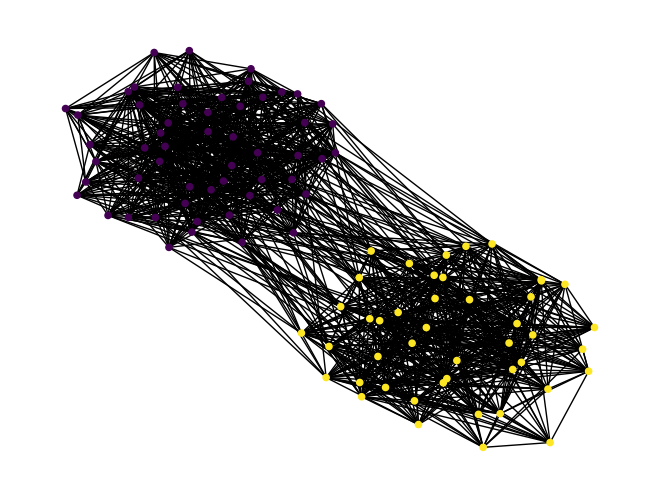

In [63]:
# Step 6 - Assign original point i to the cluster of the row i of matrix Y
cluster_labels_2 = kmeans_2.labels_
nx.draw(G_2, node_size=20, pos=nx.spring_layout(G_2, k=0.05, iterations=20), node_color=cluster_labels_2)

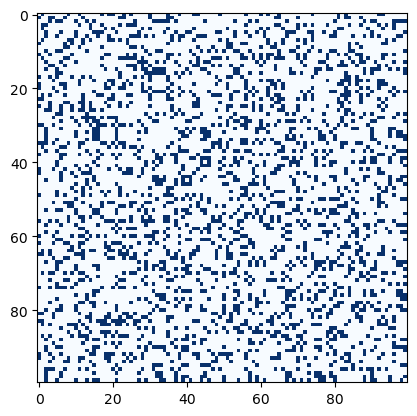

In [64]:
# Sparsity Pattern validating our results
plt.imshow(A_2, cmap='Blues', interpolation='nearest')
plt.show()

In [65]:
# THE END